# Identificando e removendo outliers

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [4]:
dados = pd.read_csv('Dados/aluguel_amostra.csv', sep = ';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
5,Apartamento,Cachambi,2,1,1,75,1400.0,715.0,0.0,18.67,Apartamento
6,Apartamento,Glória,1,0,0,52,1700.0,560.0,0.0,32.69,Apartamento
7,Apartamento,Engenho Novo,2,1,0,70,1200.0,430.0,21.0,17.14,Apartamento
8,Apartamento,Maracanã,1,1,0,59,1500.0,410.0,0.0,25.42,Apartamento
9,Apartamento,Flamengo,3,0,0,100,2500.0,980.0,105.0,25.00,Apartamento


In [17]:
valor = dados['Valor m2']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [18]:
print("[Q1] = {}".format(Q1.round(2)))
print("[Q3] = {}".format(Q3.round(2)))
print("[IIQ] = {}".format(IIQ.round(2)))
print("[Q1 - 1.5 * IIQ] = {}".format(limite_inferior.round(2)))
print("[Q3 + 1.5 * IIQ] = {}".format(limite_superior.round(2)))

[Q1] = 21.25
[Q3] = 42.31
[IIQ] = 21.06
[Q1 - 1.5 * IIQ] = -10.34
[Q3 + 1.5 * IIQ] = 73.9


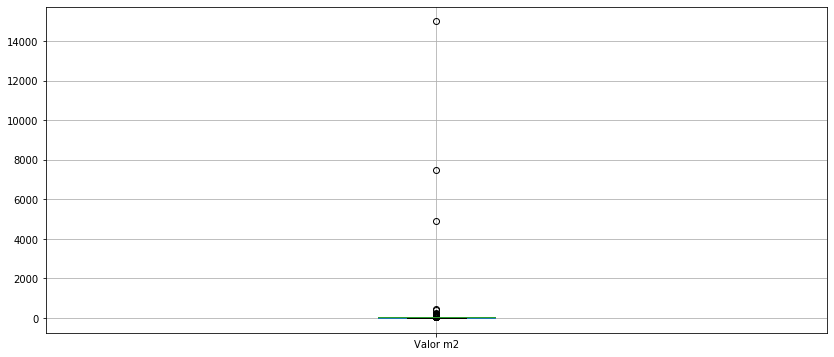

In [21]:
dados.boxplot(['Valor m2'])

In [22]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_filtro = dados[selecao]

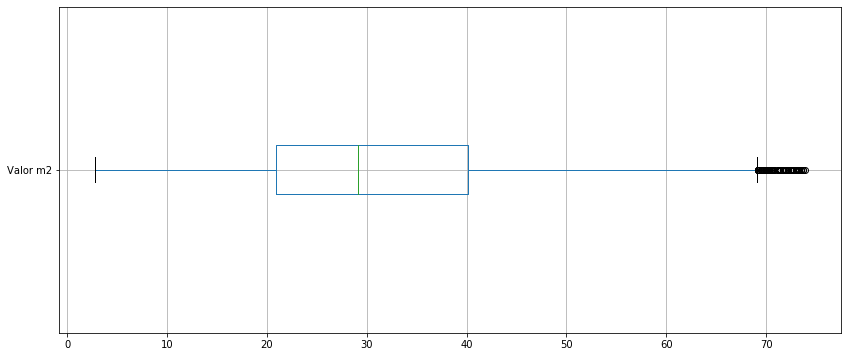

In [24]:
dados_filtro.boxplot(['Valor m2'], vert = False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000280634B9D88>]],
      dtype=object)

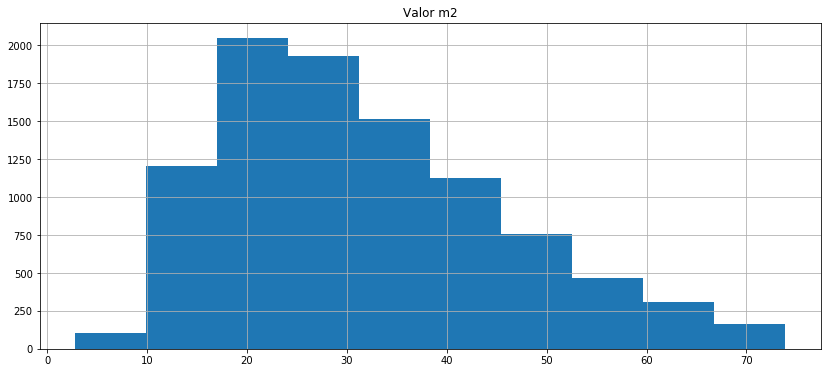

In [25]:
dados_filtro.hist(['Valor m2'])

In [26]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
5,Apartamento,Cachambi,2,1,1,75,1400.0,715.0,0.0,18.67,Apartamento
6,Apartamento,Glória,1,0,0,52,1700.0,560.0,0.0,32.69,Apartamento
7,Apartamento,Engenho Novo,2,1,0,70,1200.0,430.0,21.0,17.14,Apartamento
8,Apartamento,Maracanã,1,1,0,59,1500.0,410.0,0.0,25.42,Apartamento
9,Apartamento,Flamengo,3,0,0,100,2500.0,980.0,105.0,25.00,Apartamento


Text(0.5, 1.0, 'Total de Imóveis por Tipo')

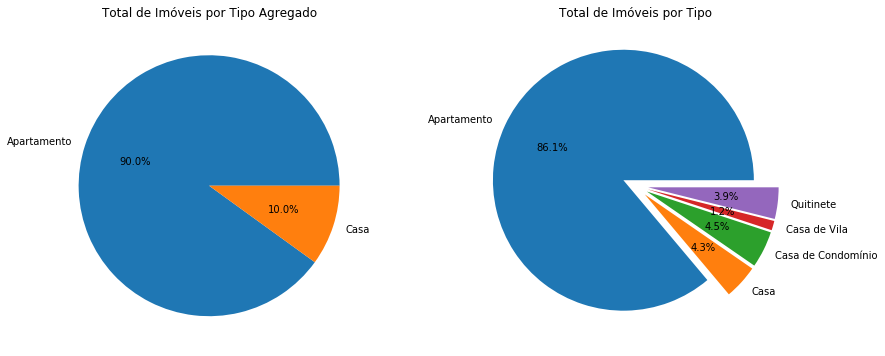

In [30]:
area = plt.figure()
g1 = area.add_subplot(1, 2, 1)
g2 = area.add_subplot(1, 2, 2)
grupo1 = dados.groupby('Tipo Agregado')['Valor']
label = grupo1.count().index
valores = grupo1.count().values
g1.pie(valores, labels = label, autopct='%1.1f%%')
g1.set_title('Total de Imóveis por Tipo Agregado')
grupo2 = dados.groupby('Tipo')['Valor']
label = grupo2.count().index
valores = grupo2.count().values
g2.pie(valores, labels = label, autopct='%1.1f%%', explode = (.1, .1, .1, .1, .1))
g2.set_title('Total de Imóveis por Tipo')